<a href="https://colab.research.google.com/github/jamshidk/CompositeFailure/blob/master/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)




train_data = pd.read_csv('data-2.csv')


Y_1 = train_data[['DefectSize']].values
Y_2 = train_data[['thickness']].values
Y_3 = train_data[['depth']].values


X_1 = train_data[['FWHM @ t*','Max deltaT', 't_max', 'FWHM @ 2t*', 'FWHM @ 0.5t*', 'Intg @ t*', 'Intg @ 2t*', 'Intg @ 0.5t*', 'DeltaT_ss', 't**' ]].values

X_2 = train_data[['FWHM @ t*','FWHM @ 2t*', 'FWHM @ 0.5t*' ]].values
X_3= train_data[['DeltaT_ss' ]].values
#scaler = StandardScaler()

Saving data-2.csv to data-2 (3).csv
2.4.1


In [ ]:
train_dataset = train_data.sample(frac=0.8, random_state=0)
test_dataset = train_data.drop(train_dataset.index)

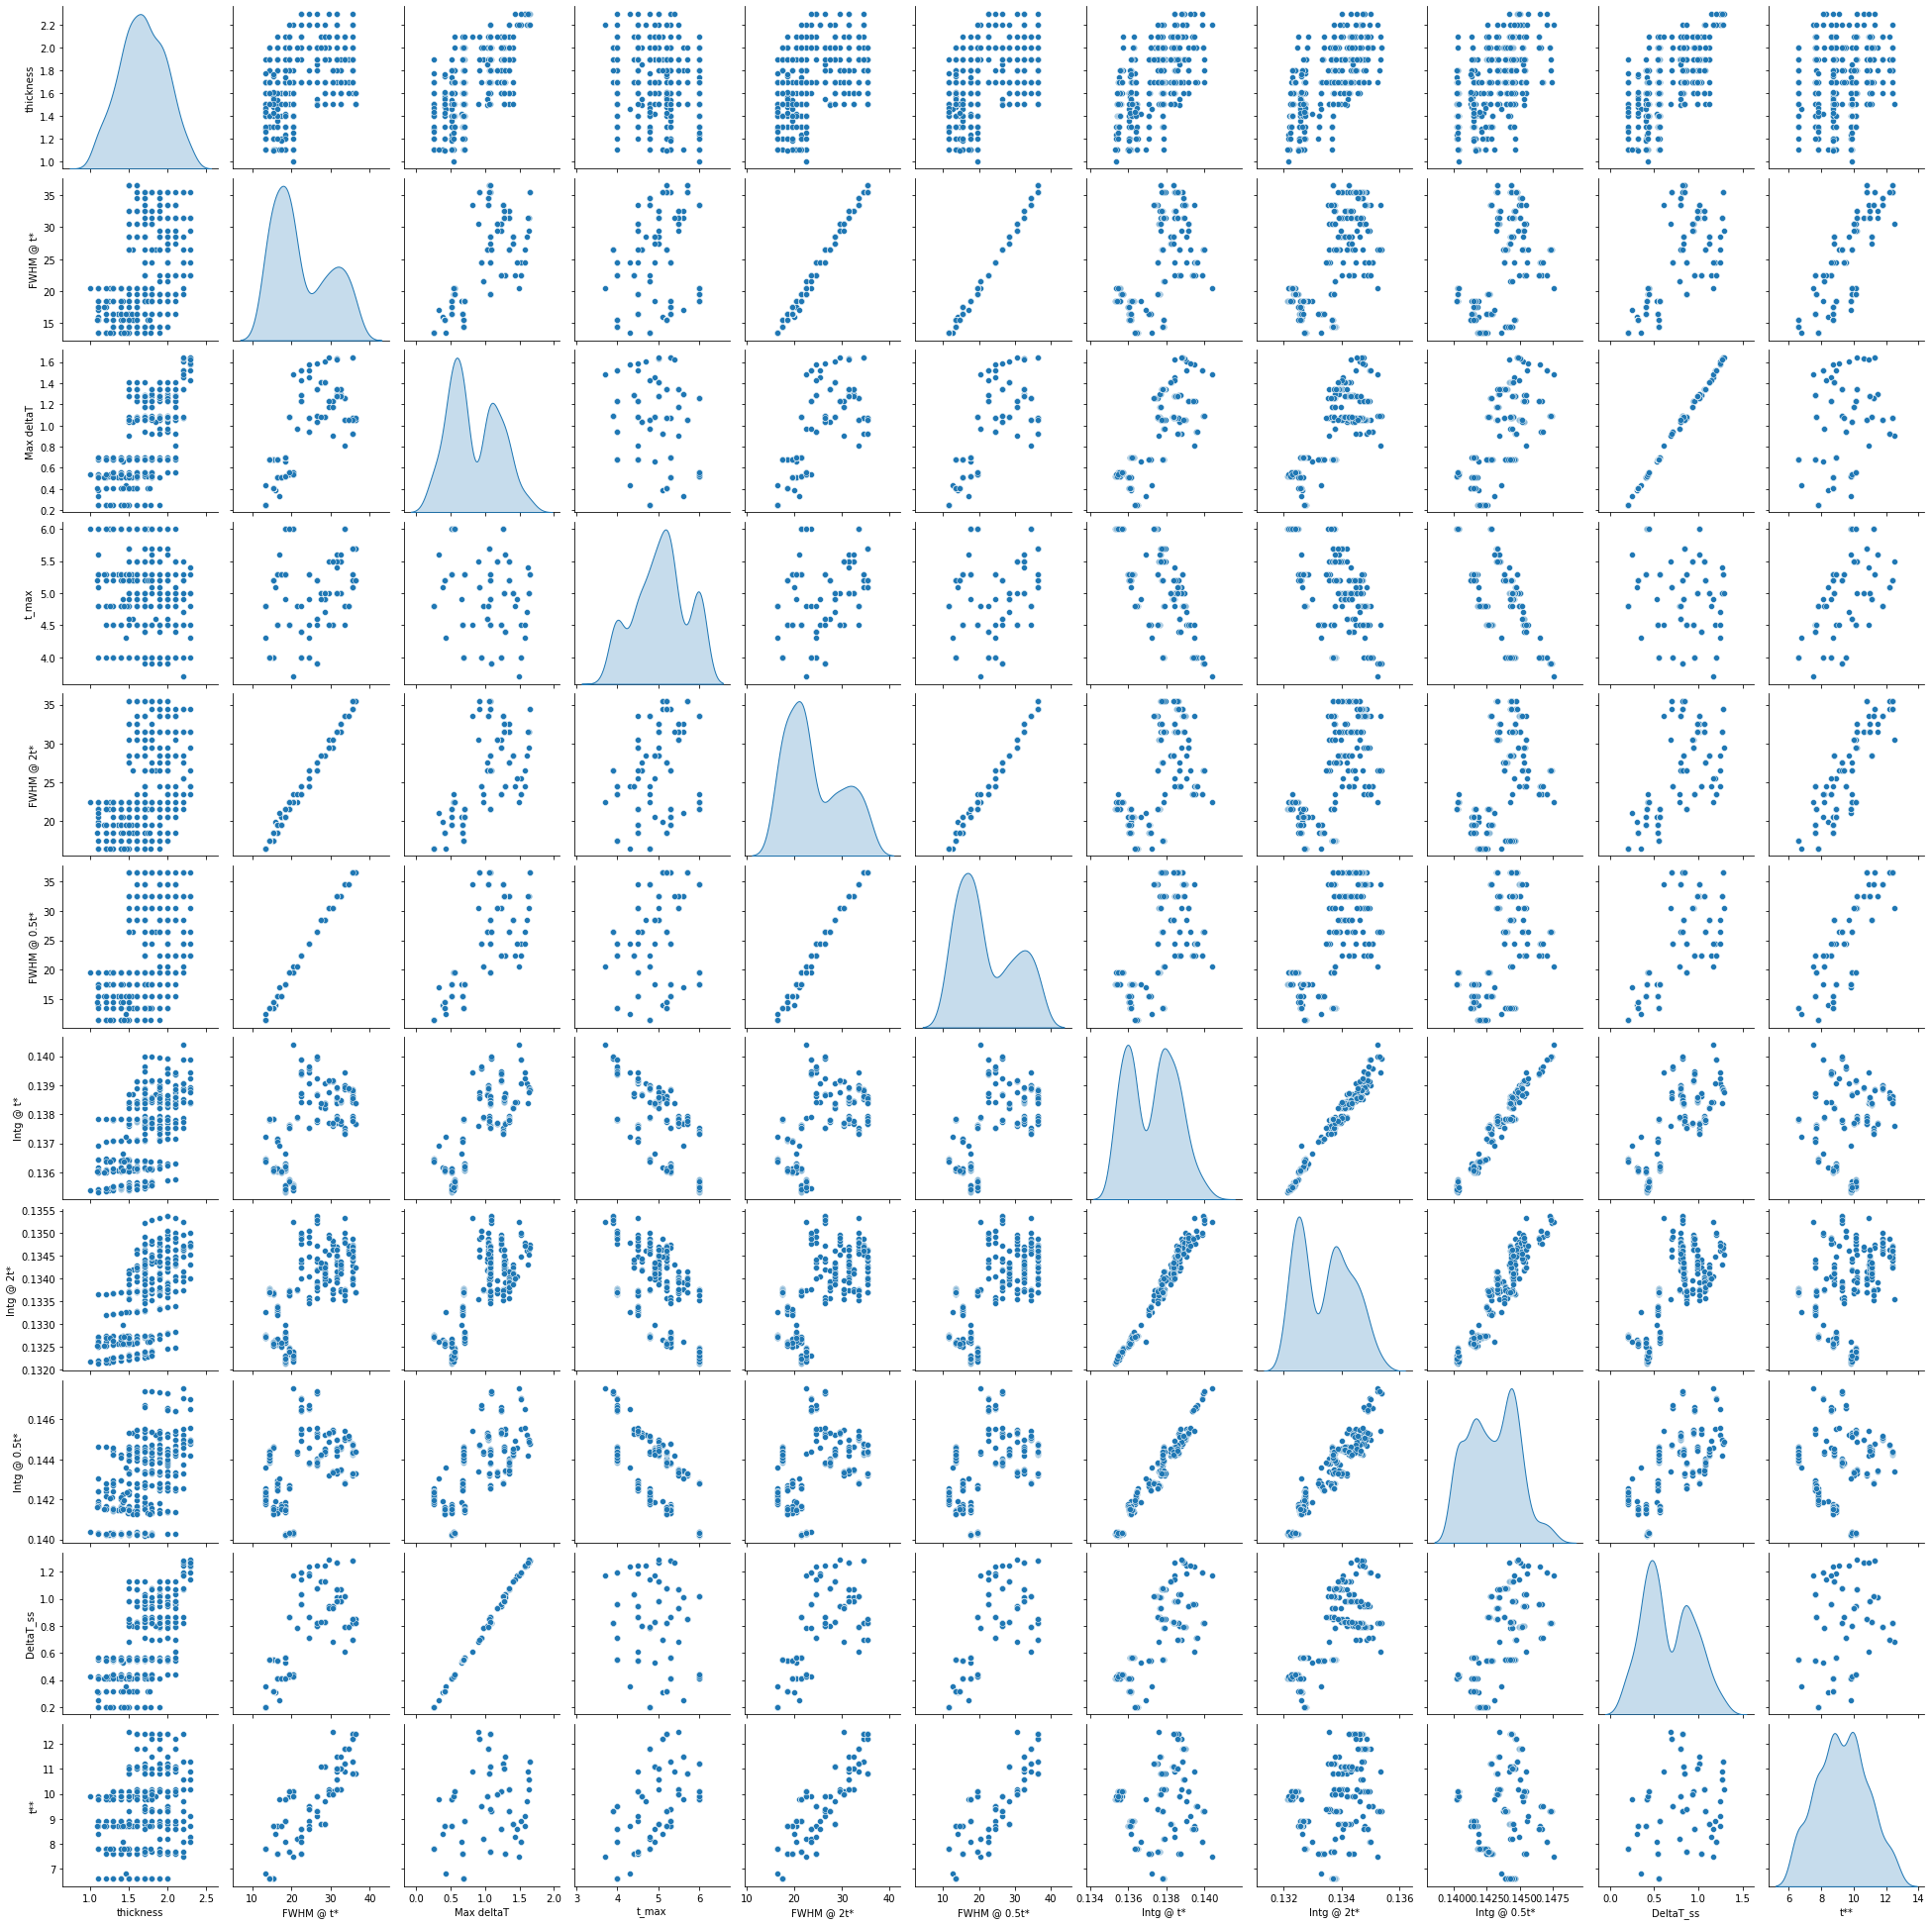

In [ ]:
sns.pairplot(train_dataset[['thickness','FWHM @ t*','Max deltaT', 't_max', 'FWHM @ 2t*', 'FWHM @ 0.5t*', 'Intg @ t*', 'Intg @ 2t*', 'Intg @ 0.5t*', 'DeltaT_ss', 't**' ]], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
depth,375.0,1.665396,0.203004,1.400000,1.500000,1.600000,1.800000,2.100000
DefectSize,375.0,22.762667,8.574286,10.000000,16.000000,20.000000,30.000000,38.000000
thickness,375.0,1.679796,0.290659,1.000000,1.500000,1.700000,1.900000,2.300000
Max deltaT,375.0,0.837390,0.359681,0.252008,0.538280,0.700449,1.080303,1.645056
FWHM @ t*,375.0,22.510744,7.128766,13.500027,16.500033,20.500042,28.500058,36.500074
t_max,375.0,5.059733,0.630300,3.700000,4.500000,5.100000,5.450000,6.000000
FWHM @ 2t*,375.0,24.097416,5.836175,16.500033,19.500032,22.500046,28.500058,35.500072
FWHM @ 0.5t*,375.0,22.012107,7.926475,11.500023,15.500031,19.500040,28.500058,36.500074
Intg @ t*,375.0,0.137259,0.001275,0.135324,0.136080,0.137534,0.138374,0.140411
Intg @ 2t*,375.0,0.133446,0.000896,0.132133,0.132590,0.133668,0.134184,0.135378


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('thickness')
test_labels = test_features.pop('thickness')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
depth,1.665396,0.203004
DefectSize,22.762667,8.574286
thickness,1.679796,0.290659
Max deltaT,0.837390,0.359681
FWHM @ t*,22.510744,7.128766
t_max,5.059733,0.630300
FWHM @ 2t*,24.097416,5.836175
FWHM @ 0.5t*,22.012107,7.926475
Intg @ t*,0.137259,0.001275
Intg @ 2t*,0.133446,0.000896


In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[ 1.6653963  22.762667    0.83739036 22.510744    5.0597334  24.097416
 22.012108    0.13725927  0.13344614  0.14295037  0.66002953  9.296267  ]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 1.9  16.    0.52 17.5   5.3  19.5  15.5   0.14  0.13  0.14  0.41  8.7 ]]

Normalized: [[ 1.16 -0.79 -0.9  -0.7   0.38 -0.79 -0.82 -0.95 -0.95 -0.78 -0.89 -0.39]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.22 s, sys: 271 ms, total: 8.49 s
Wall time: 8.07 s


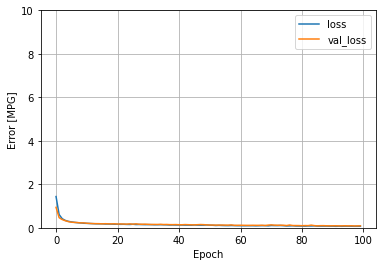

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error [Defect size]
tmax_model,7.140057
linear_model,0.251862
dnn_model,0.091330


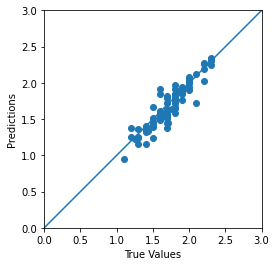

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

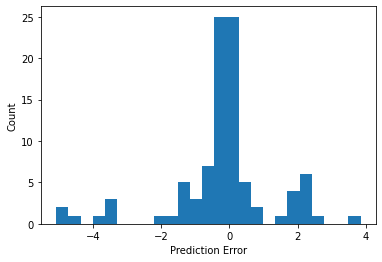

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')